In [62]:
from carculator_truck import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from scipy import interpolate

In [3]:
from carculator_truck import *
tip = TruckInputParameters() 
tip.static()
_, array = fill_xarray_from_input_parameters(tip)
tm = TruckModel(array, cycle="Long haul")
tm.array.loc[dict(parameter="capacity utilization")] = 0
tm.set_all()

In [7]:
ecm = EnergyConsumptionModel("Long haul", "Long haul")
(rolling_resistance,
air_resistance,
 gradient_resistance,
 inertia,
 braking_loss,
 total_power,
 energy) = ecm.motive_energy_per_km(
    tm["driving mass"],
    tm["rolling resistance coefficient"],
    tm["aerodynamic drag coefficient"],
    tm["frontal area"],
    tm["TtW efficiency"],
    tm["recuperation efficiency"],
    tm["electric power"],
    True
)

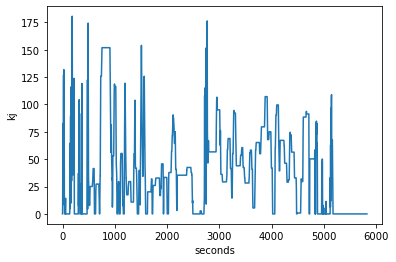

In [211]:
(total_power/1000).sel(year=2, powertrain=0, size=0).plot(label="carculator_truck")
plt.ylabel("kj")
plt.xlabel("seconds")
power = (total_power/1000).sel(year=2, powertrain=0, size=0)

In [245]:
def wheel_circumference(radius):
    return 2*np.pi*radius

def wheel_rpm(wheel_circ, speed):
    """Returns wheel RPM"""
    # from km/h to m/min
    speed = speed * 1000 / 60
    return speed/wheel_circ

def wheel_torque(w_rpm, power):
    """Retuns torque at wheel"""
    return (60/(2*np.pi))*(power*1000/w_rpm)
    #return (power) * 9.550 /w_rpm
    
cycle = get_standard_driving_cycle("Long haul")
speed = cycle.T[0]
wc = wheel_circumference(0.5)
w_rpm = wheel_rpm(wc, speed)

w_torque = wheel_torque(w_rpm, power)

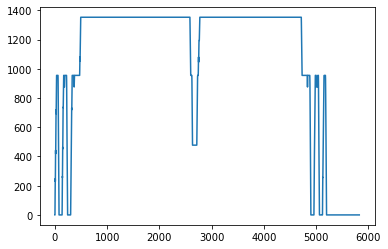

In [259]:
plt.plot(w_rpm*3)

In [248]:
def get_axle_speed_and_loss():
    axle_torque_file = r"C:\Users\romai\Downloads\vecto\2020_05_18-VECTO-3.3.7.1964\Generic Vehicles\Engineering Mode\Class2_RigidTruck_4x2\Axle_4x2.vtlm"
    df_axle_torque = pd.read_csv(axle_torque_file)
    df_axle_torque["Output Torque [Nm]"] = df[["Input Torque [Nm]", "Torque Loss [Nm]"]].sum(axis=1)
    axle_ratio = 2.64
    x = df_axle_torque["Input Speed [rpm]"]
    y = df_axle_torque["Output Torque [Nm]"]
    xx, yy = np.meshgrid(x, y)
    z = df_axle_torque["Input Torque [Nm]"]
    f = interpolate.interp2d(x, y, z, kind='linear')
    return axle_ratio, f


In [260]:
axle_speed_out_multiplier, axle_torque_fit = get_axle_speed_and_loss()
axle_rpm_in = w_rpm * axle_speed_out_multiplier
axle_torque_in = np.nan_to_num(
                    np.squeeze(
                        [axle_torque_fit(x, y) for x, y in zip(axle_rpm_in, w_torque)]
                    ),
                0)
axle_power_in = axle_torque_in * axle_rpm_in / 9550

C:\Users\romai\AppData\Roaming\Python\Python37\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=22,4 m=156 fp=10075.064679 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


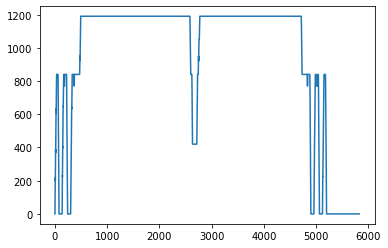

In [261]:
#plt.plot(w_torque)
plt.plot(axle_rpm_in)

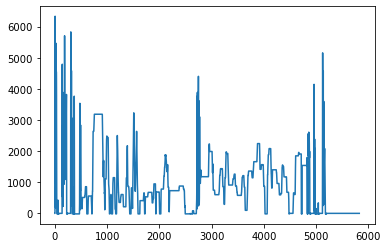

In [262]:
plt.plot(axle_torque_in)

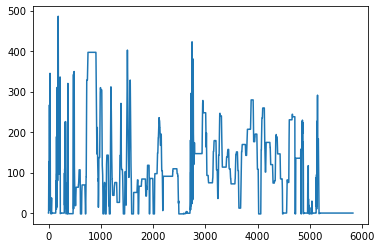

In [263]:
plt.plot(axle_power_in)

In [117]:
w_torque.shape

(5825,)

In [124]:
axle_torque_fit(np.vstack((axle_rpm_in, w_torque)))

TypeError: __call__() missing 1 required positional argument: 'y'

In [110]:
axle_torque_fit

In [108]:
axle_torque_in

array([[-4.92965341, -4.92965341, -4.92965341, ..., -6.1196004 ,
        -6.1196004 , -6.1196004 ],
       [-4.92965341, -4.92965341, -4.92965341, ..., -6.1196004 ,
        -6.1196004 , -6.1196004 ],
       [-4.92965341, -4.92965341, -4.92965341, ..., -6.1196004 ,
        -6.1196004 , -6.1196004 ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [102]:
axle_torque_fit(950, 1989)

array([1944.16280066])

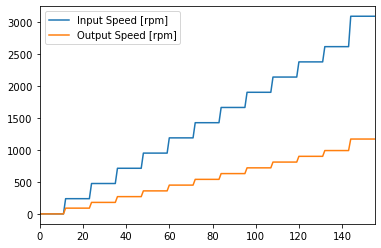

In [60]:
df_axle_torque[["Input Speed [rpm]", "Output Speed [rpm]"]].plot()

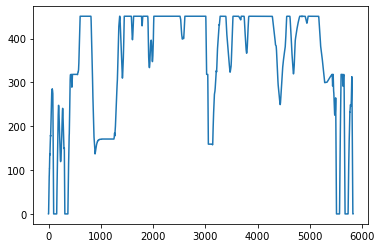

In [42]:
plt.plot(w_rpm)

In [21]:
cycle = get_standard_driving_cycle("Long haul")

In [27]:
cycle.T[0]

array([0. , 0. , 1.8, ..., 0. , 0. , 0. ])